In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.activations import relu, softmax
from keras.utils import to_categorical
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, History 

import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
#import cv2
import numpy as np

Using TensorFlow backend.


In [31]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(160,160,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

#model.add(Conv2D(128, (3,3)))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(6, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 158, 158, 128)     3584      
_________________________________________________________________
batch_normalization_4 (Batch (None, 158, 158, 128)     512       
_________________________________________________________________
activation_4 (Activation)    (None, 158, 158, 128)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 52, 52, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 52, 52, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 256)       295168    
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 256)       1024      
__________

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
stopper = EarlyStopping(monitor='acc',  patience=10 ,mode='auto')
history = History()

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving imageX.npy to imageX.npy
User uploaded file "imageX.npy" with length 48384128 bytes


In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving labelY.npy to labelY.npy
User uploaded file "labelY.npy" with length 2648 bytes


In [0]:
Img = np.load("imageX.npy")
labels = np.load("labelY.npy")

In [34]:
Img.shape

(630, 160, 160, 3)

In [0]:
label = to_categorical(labels)

In [38]:
model.fit(x=Img, y=label, batch_size=32, epochs=500, callbacks=[history] , validation_split=0.1)

Train on 567 samples, validate on 63 samples
Epoch 1/500
567/567 [==============================] - 6s 10ms/step - loss: 0.2499 - acc: 0.1869 - val_loss: 0.3309 - val_acc: 0.0000e+00
Epoch 2/500
567/567 [==============================] - 5s 8ms/step - loss: 0.2319 - acc: 0.2698 - val_loss: 0.3315 - val_acc: 0.0000e+00
Epoch 3/500
567/567 [==============================] - 4s 8ms/step - loss: 0.2203 - acc: 0.3086 - val_loss: 0.3051 - val_acc: 0.0476
Epoch 4/500
567/567 [==============================] - 5s 8ms/step - loss: 0.2214 - acc: 0.2892 - val_loss: 0.3253 - val_acc: 0.0000e+00
Epoch 5/500
567/567 [==============================] - 5s 8ms/step - loss: 0.2219 - acc: 0.2840 - val_loss: 0.3215 - val_acc: 0.0000e+00
Epoch 6/500
567/567 [==============================] - 5s 8ms/step - loss: 0.2059 - acc: 0.3298 - val_loss: 0.3239 - val_acc: 0.0000e+00
Epoch 7/500
567/567 [==============================] - 5s 8ms/step - loss: 0.2047 - acc: 0.3369 - val_loss: 0.3286 - val_acc: 0.0000e+00

In [11]:
scores = model.evaluate(x=Img, y=label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 86.83%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


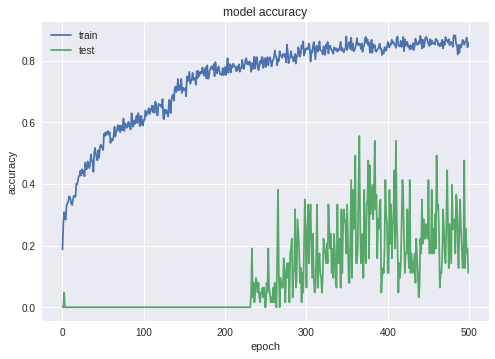

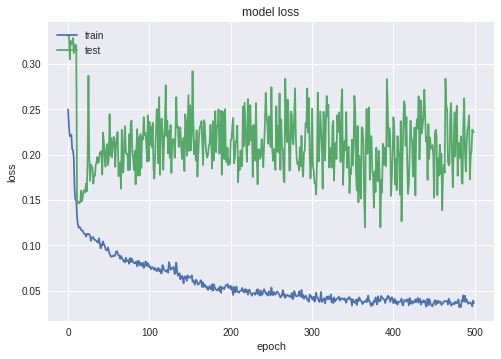

In [48]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [43]:
model_json = model.to_json()
with open("drive/modelnew.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/modelnew.h5")
print("Saved model to drive")

Saved model to drive


In [0]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [45]:
json_file = open('modelnew.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelnew.h5")
print("Loaded model from disk")
 

FileNotFoundError: ignored

In [0]:
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
scores = model.evaluate(x=Img, y=label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


NameError: ignored

In [0]:
#model modifikasi 5 cnn dan 3 mlp
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(160,160,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv2d_5/convolution' (op: 'Conv2D') with input shapes: [?,2,2,128], [3,3,128,128].

In [0]:
#example model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

ValueError: ignored

In [0]:
 createModel.summary()

AttributeError: 'function' object has no attribute 'summary'

In [0]:
def model3() :
    model = Sequential()
# Must define the input shape in the first layer of the neural network
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(MaxPooling2D(pool_size=(2, 3)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 3)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 3)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Take a look at the model summary
    return model
    summary()

In [0]:
model = Sequential()
# first set of CONV => RELU => POOL layers
model.add(Conv2D(20, (3, 3), padding="same", Activation("relu"), input_shape=(160,160,3))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# second set of CONV => RELU => POOL layers
model.add(Conv2D(50, (3, 3), padding="same", Activation("relu")))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
 
# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))
 
# return the constructed network architecture
return model

SyntaxError: invalid syntax (<ipython-input-40-5818a51be1a8>, line 4)

In [0]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total para

In [29]:
scores = model.evaluate(x=Img, y=labels, verbose=0)

ValueError: ignored

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: ignored

In [0]:
predictY = models.predict(Img)

NameError: ignored

In [0]:
count = 0
for i in range(label.shape[0]):
    if (predictY[i]==label[i]).all():
        count+=1

In [28]:
label[10], predictY[10]

NameError: ignored

In [0]:

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [0]:
#pip list | grep tensorflow

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())